## Random Forest

In [108]:
import pandas as pd
data = pd.read_csv("train_data.csv")

In [109]:
X = data.drop(columns=["Survived", "PassengerId"])
y = data[["Survived"]]

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_vaild, y_train, y_vaild = train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
from sklearn.ensemble import RandomForestClassifier


rdf_clf = RandomForestClassifier(n_estimators=250)
rdf_clf.fit(X_train,y_train)

c:\ProgramData\Anaconda3\envs\py_scikit\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=250)

In [112]:
y_vaild_pred = rdf_clf.predict(X_vaild)

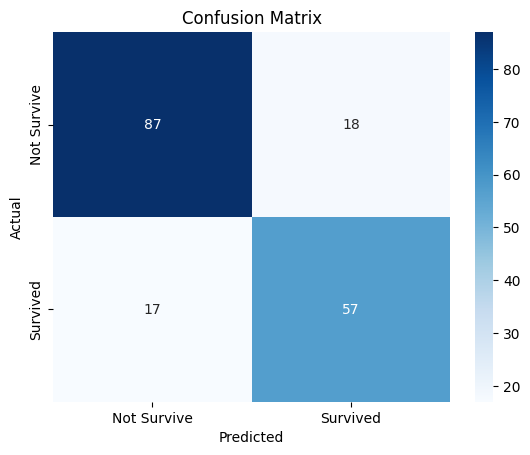

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

vaild_cm = confusion_matrix(y_vaild, y_vaild_pred)

sns.heatmap(vaild_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survive', 'Survived'], yticklabels=['Not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0.7651006711409396


Text(0, 0.5, 'Precision')

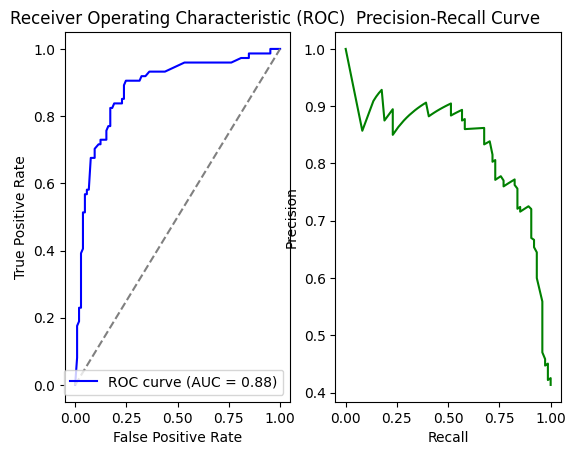

In [114]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score

vaild_pred_prob = rdf_clf.predict_proba(X_vaild)[:, 1]
vaild_precision, vaild_recall, _ = precision_recall_curve(y_vaild, vaild_pred_prob)
vaild_fpr, vaild_tpr, _ = roc_curve(y_vaild, vaild_pred_prob)

print(f1_score(y_vaild ,y_vaild_pred))

plt.subplot(1, 2, 1)
plt.plot(vaild_fpr, vaild_tpr, color='blue', label=f'ROC curve (AUC = {auc(vaild_fpr, vaild_tpr):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(vaild_recall, vaild_precision, color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

## Prediction

In [120]:
X_test = pd.read_csv("test_data.csv")

y_test_pred = rdf_clf.predict(X_test.drop(columns=["PassengerId"]))
X_test["Survived"] = y_test_pred
X_test[["PassengerId","Survived"]].to_csv("submission.csv", index=False)